In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
L 1 2; right, size=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")


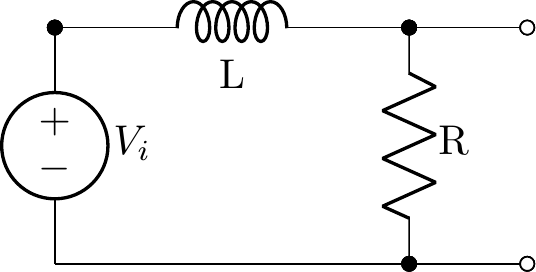

In [2]:
cct.draw()

In [3]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify()

In [4]:
H(j * omega)

    R    
─────────
ⅉ⋅L⋅ω + R

In [5]:
H(j * omega).rationalize_denominator()

            2
-ⅉ⋅L⋅R⋅ω + R 
─────────────
   2  2    2 
  L ⋅ω  + R  

In [6]:
H(j * omega).real_imag

                    2    
   ⅉ⋅L⋅R⋅ω         R     
- ────────── + ──────────
   2  2    2    2  2    2
  L ⋅ω  + R    L ⋅ω  + R 

In [7]:
H(j * omega).magnitude


       R       
───────────────
   ____________
  ╱  2  2    2 
╲╱  L ⋅ω  + R  

In [8]:
H(j * omega).phase_degrees

         ⎛L⋅ω⎞ 
-180⋅aₜₐₙ⎜───⎟ 
         ⎝ R ⎠ 
───────────────
       π       

In [9]:
H1 = H.subs('L',1).subs('R',1e3)
H1(j * omega)

   1000   
──────────
ⅉ⋅ω + 1000

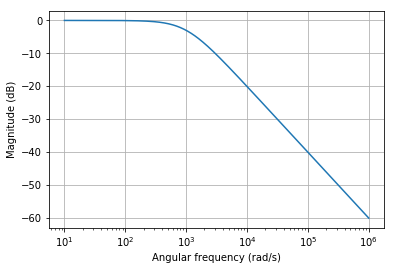

In [10]:
from numpy import logspace
w = logspace(1, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

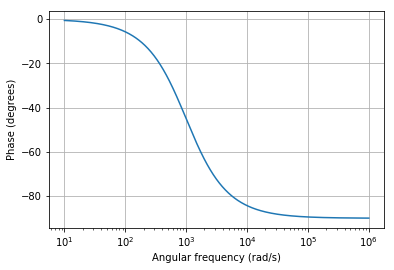

In [11]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)